In [ ]:
###########################################################################
# 
# 
# Date:       
# Author:   BP
# Subject:  Venues as a Predictor of Home Values - Austin, TX
# 
###########################################################################

In [ ]:
##################################################
#
#
#Section 1 - Importing Data and Data Cleaning/Formatting (Methodology)
#
#
##################################################

In [1]:
##################################################
####Import Required Packages

import numpy as np
import pandas as pd
import os

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
##################################################
####Import Zillow Data

inpath = "..."
inpath_2 = "..."
output = "..."

zillow_0 = pd.read_csv(os.path.join(inpath, "Neighborhood_Zhvi_AllHomes_20200330.csv"))

In [3]:
##################################################
####Formatting Zillow Data

zillow_col_ls_0 = list(zillow_0)

zillow_col_ls_1 = zillow_col_ls_0[0:7]

zillow_col_ls_2 = [x for x in zillow_col_ls_0 if "2019" in x]

zillow_col_ls_1.extend(zillow_col_ls_2)
##generate a list of columns we want to keep

In [4]:
print(zillow_col_ls_1)
##check that generated list has the correct column names

['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']


In [5]:
zillow_1 = zillow_0[zillow_col_ls_1]

zillow_2 = zillow_1[zillow_1["City"] == "Austin"]

zillow_2
##subset zillow data to keep columns in generated list and limit data to Austin

#with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
#    display(zillow_2)
##alternate option to view all columns

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
430,274685,North Austin,Austin,TX,Austin-Round Rock,Travis County,431,304504,306212,308821,311023,312377,313511,314681,315440,316953,317112,318496,320800
719,271391,Franklin Park,Austin,TX,Austin-Round Rock,Travis County,720,214612,217121,218598,220498,222197,223831,225678,227046,228653,229623,230870,231532
814,275057,Pleasant Valley,Austin,TX,Austin-Round Rock,Travis County,815,234869,236887,238552,239372,239840,240833,242029,242990,244273,245062,246407,247677
839,271652,Windsor Park,Austin,TX,Austin-Round Rock,Travis County,840,384101,385876,386983,388243,387965,388068,387409,387640,388882,390129,392434,394064
873,271635,West University,Austin,TX,Austin-Round Rock,Travis County,874,303412,304667,305372,306049,306409,306291,306248,306148,307198,307724,308835,309546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,271653,Bryker Woods,Austin,TX,Austin-Round Rock,Travis County,8254,837877,845331,847715,850707,851600,852219,852815,850528,850242,850393,854879,855541
8299,231200,Barton Creek,Austin,TX,Austin-Round Rock,Travis County,8300,1314344,1323067,1327578,1335119,1342012,1347000,1352977,1355768,1362536,1363470,1368368,1366064
8809,271327,Chestnut,Austin,TX,Austin-Round Rock,Travis County,8810,433915,437433,439616,441979,442191,442913,443095,444535,446806,447714,449697,450963
9596,271442,Johnston Terrace,Austin,TX,Austin-Round Rock,Travis County,9597,323681,328845,332285,335558,338235,338573,338405,337360,338776,339522,341996,341690


In [6]:
zillow_2["Avg_HmVal_2019"] = zillow_2[zillow_col_ls_2].mean(axis=1)
##calculate 2019 average median home value

c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
zillow_col_ls_3 = ["RegionID", "RegionName", 
                   "City", "State", 
                   "Metro", "CountyName", 
                   "SizeRank", "Avg_HmVal_2019"]

zillow_3 = zillow_2[zillow_col_ls_3]
pd.options.display.float_format = '{:.4f}'.format
##subset data to keep only needed columns

In [8]:
zillow_3
##check to see if dataframe looks as intended

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Avg_HmVal_2019
430,274685,North Austin,Austin,TX,Austin-Round Rock,Travis County,431,313327.5000
719,271391,Franklin Park,Austin,TX,Austin-Round Rock,Travis County,720,224188.2500
814,275057,Pleasant Valley,Austin,TX,Austin-Round Rock,Travis County,815,241565.9167
839,271652,Windsor Park,Austin,TX,Austin-Round Rock,Travis County,840,388482.8333
873,271635,West University,Austin,TX,Austin-Round Rock,Travis County,874,306491.5833
...,...,...,...,...,...,...,...,...
8253,271653,Bryker Woods,Austin,TX,Austin-Round Rock,Travis County,8254,849987.2500
8299,231200,Barton Creek,Austin,TX,Austin-Round Rock,Travis County,8300,1346525.2500
8809,271327,Chestnut,Austin,TX,Austin-Round Rock,Travis County,8810,443404.7500
9596,271442,Johnston Terrace,Austin,TX,Austin-Round Rock,Travis County,9597,336243.8333


In [9]:
##################################################
####Importing Spot Crime and Merging to Zillow

spot_crime_0 = pd.read_excel(os.path.join(inpath, "spotcrime_austin_20200402.xlsx"))

zillow_spot_xwalk_0 = pd.read_excel(os.path.join(inpath_2, "zillow_spotcrime_bridge_20200407.xlsx"))

In [10]:
zillow_4 = pd.merge(zillow_3, 
                    zillow_spot_xwalk_0,
                    how = "left",
                    left_on = "RegionName", 
                    right_on = "zillow_neighborhood").drop("zillow_neighborhood", axis=1)

##merge bridge to zillow data

In [11]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
    display(zillow_4)
##check to make sure merge was succesful

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Avg_HmVal_2019,spotcrime_neighborhood
0,274685,North Austin,Austin,TX,Austin-Round Rock,Travis County,431,313327.5000,North Austin
1,271391,Franklin Park,Austin,TX,Austin-Round Rock,Travis County,720,224188.2500,Franklin Park
2,275057,Pleasant Valley,Austin,TX,Austin-Round Rock,Travis County,815,241565.9167,Pleasant Valley
3,271652,Windsor Park,Austin,TX,Austin-Round Rock,Travis County,840,388482.8333,Windsor Park
4,271635,West University,Austin,TX,Austin-Round Rock,Travis County,874,306491.5833,West Unversity
5,416968,West Oak Hill,Austin,TX,Austin-Round Rock,Travis County,894,436668.0833,NaN
6,416969,East Oak Hill,Austin,TX,Austin-Round Rock,Travis County,1064,487967.9167,NaN
7,276540,Riverside,Austin,TX,Austin-Round Rock,Travis County,1146,374641.5000,Riverside
8,235693,Montopolis,Austin,TX,Austin-Round Rock,Travis County,1229,272338.5000,Montopolis
9,271395,Garrison Park,Austin,TX,Austin-Round Rock,Travis County,1251,342308.9167,Garrison Park


In [12]:
zillow_5 = pd.merge(zillow_4, 
                    spot_crime_0[["neighborhood", "total_count"]],
                    how = "left",
                    left_on = "spotcrime_neighborhood", 
                    right_on = "neighborhood").drop("neighborhood", axis=1)

##merge spotcrime total crime count to zillow data

In [13]:
zillow_5["geo_loc"] = zillow_5[["RegionName", "City", "State"]].agg(", ".join, axis=1)

##generate new column for geocoding/merging

In [ ]:
##################################################
####Geo-coding zillow neighborhoods - Skip After Excel File Has Been Exported

zillow_geo_0 = zillow_5[["geo_loc"]]

geolocator = Nominatim(user_agent = "austin_geo")

atx_geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

##prepare df for geocoding

In [ ]:
zillow_geo_0["location"] = zillow_geo_0["geo_loc"].apply(atx_geocode)

zillow_geo_0["point"] = zillow_geo_0["location"].apply(lambda loc: tuple(loc.point) if loc else None)

##geocode each neighborhood

In [ ]:
zillow_geo_0[["latitude", "longitude", "altitude"]] = pd.DataFrame(zillow_geo_0["point"].tolist(), 
                                                                   index=zillow_geo_0.index)

##split out information for use in zillow data

In [ ]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
    display(zillow_geo_0)
##lets view the full results of the geocode
##it looks like there are a few which didn't work
##let's export this df and see if we can manually fix this

In [ ]:
zillow_geo_0.to_excel(os.path.join(output, "zillow_geo_raw.xlsx"), sheet_name = "Sheet1")  
##export zillow_geo_0 for manual adjustments

In [14]:
##################################################
####Merging final geo-codes to zillow data

zillow_geo_1 = pd.read_excel(os.path.join(inpath_2, "zillow_geo_edit_20200415.xlsx"))
##after manually adding lat/longs for 5 neighborhoods, all are geo-coded

In [15]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
    display(zillow_geo_1)
##view manually adjusted 

,geo_loc,location,latitude,longitude
0,"North Austin, Austin, TX","North, 11410, Century Oaks Terrace, Rock Rose,...",30.4023,-97.7260
1,"Franklin Park, Austin, TX","Franklin Park, Austin, Travis County, Texas, 7...",30.1969,-97.7488
2,"Pleasant Valley, Austin, TX","Pleasant Valley, Austin, Travis County, Texas,...",30.2310,-97.7158
3,"Windsor Park, Austin, TX","Windsor Park, Austin, Travis County, Texas, 78...",30.3135,-97.6911
4,"West University, Austin, TX",manually_entered,30.2896,-97.7459
5,"West Oak Hill, Austin, TX","West Oak Hill, Austin, Travis County, Texas, 7...",30.2385,-97.8890
6,"East Oak Hill, Austin, TX",manually_entered,30.2442,-97.8357
7,"Riverside, Austin, TX",manually_entered,30.2386,-97.7305
8,"Montopolis, Austin, TX","Montopolis, Austin, Travis County, Texas, 7874...",30.2249,-97.7034
9,"Garrison Park, Austin, TX","Garrison Park, Austin, Travis County, Texas, 7...",30.2064,-97.7997


In [16]:
zillow_6 = pd.merge(zillow_5, 
                    zillow_geo_1[["geo_loc", "latitude", "longitude"]],
                    how = "left",
                    left_on = "geo_loc", 
                    right_on = "geo_loc")
##merge lats and long to primary df

In [17]:
zillow_6
##view data frame

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Avg_HmVal_2019,spotcrime_neighborhood,total_count,geo_loc,latitude,longitude
0,274685,North Austin,Austin,TX,Austin-Round Rock,Travis County,431,313327.5000,North Austin,418.0000,"North Austin, Austin, TX",30.4023,-97.7260
1,271391,Franklin Park,Austin,TX,Austin-Round Rock,Travis County,720,224188.2500,Franklin Park,255.0000,"Franklin Park, Austin, TX",30.1969,-97.7488
2,275057,Pleasant Valley,Austin,TX,Austin-Round Rock,Travis County,815,241565.9167,Pleasant Valley,327.0000,"Pleasant Valley, Austin, TX",30.2310,-97.7158
3,271652,Windsor Park,Austin,TX,Austin-Round Rock,Travis County,840,388482.8333,Windsor Park,167.0000,"Windsor Park, Austin, TX",30.3135,-97.6911
4,271635,West University,Austin,TX,Austin-Round Rock,Travis County,874,306491.5833,West Unversity,1132.0000,"West University, Austin, TX",30.2896,-97.7459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,271653,Bryker Woods,Austin,TX,Austin-Round Rock,Travis County,8254,849987.2500,NaN,nan,"Bryker Woods, Austin, TX",30.3052,-97.7546
59,231200,Barton Creek,Austin,TX,Austin-Round Rock,Travis County,8300,1346525.2500,NaN,nan,"Barton Creek, Austin, TX",30.2694,-97.9593
60,271327,Chestnut,Austin,TX,Austin-Round Rock,Travis County,8810,443404.7500,Chestnut,292.0000,"Chestnut, Austin, TX",30.2793,-97.7137
61,271442,Johnston Terrace,Austin,TX,Austin-Round Rock,Travis County,9597,336243.8333,Johnston Terrace,61.0000,"Johnston Terrace, Austin, TX",30.2586,-97.6853


In [18]:
##################################################
####AreaVibes School Score Data

austin_school_0 = pd.read_excel(os.path.join(inpath, "areavibes_austin_schools_20200404.xlsx"))

austin_school_0["geo_loc"] = austin_school_0[["school_address", "city", "state"]].agg(", ".join, axis=1)
##generate new column for geocoding

In [ ]:
##################################################
####Geo-coding AreaVibes School Score Data - Skip After Excel File Has Been Exported

atx_scl_geo_0 = austin_school_0[["geo_loc"]]

geolocator = Nominatim(user_agent = "austin_geo")

atx_geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
##prepare df for geocoding

In [ ]:
atx_scl_geo_0["location"] = atx_scl_geo_0["geo_loc"].apply(atx_geocode)

atx_scl_geo_0["point"] = atx_scl_geo_0["location"].apply(lambda loc: tuple(loc.point) if loc else None)

##geocode each school

In [ ]:
atx_scl_geo_0[["latitude", "longitude", "altitude"]] = pd.DataFrame(atx_scl_geo_0["point"].tolist(), 
                                                                   index=atx_scl_geo_0.index)

##split out information for use in zillow data

In [ ]:
atx_scl_geo_0

In [ ]:
atx_scl_geo_0.to_excel(os.path.join(output, "atx_scl_geo_raw.xlsx"), sheet_name = "Sheet1")  
##export zillow_geo_0 for manual adjustments

In [19]:
##################################################
####Calculating Distances Between Neighborhoods and Schools

atx_scl_geo_1 = pd.read_excel(os.path.join(inpath_2, "atx_scl_geo_edit_20200413.xlsx"))
##after manually adding lat/longs for 47 schools, all except 2 are geo-coded
##duplicate addresses are removed from the excel file

In [20]:
austin_school_1 = pd.merge(austin_school_0, 
                           atx_scl_geo_1[["geo_loc", "latitude", "longitude"]],
                           how = "left",
                           left_on = "geo_loc", 
                           right_on = "geo_loc")
##merge lats/longs back to school scores

In [21]:
austin_school_1
##review data

,state,city,date,school_name,school_address,district,score,geo_loc,latitude,longitude
0,TX,Austin,2020-04-04,Canyon Creek Elementary School,10210 Ember Glen Dr,Round Rock ISD,0.9900,"10210 Ember Glen Dr, Austin, TX",30.4371,-97.8248
1,TX,Austin,2020-04-04,Forest Trail Elementary School,1203 Loop 360 S,Eanes ISD,0.9800,"1203 Loop 360 S, Austin, TX",30.2809,-97.8199
2,TX,Austin,2020-04-04,Lake Pointe Elementary School,3322 Ranch Rd 620 S,Lake Travis ISD,0.9800,"3322 Ranch Rd 620 S, Austin, TX",30.3278,-97.9654
3,TX,Austin,2020-04-04,Laurel Mountain Elementary School,10111 Dk Ranch Rd,Round Rock ISD,0.9700,"10111 Dk Ranch Rd, Austin, TX",30.4136,-97.7809
4,TX,Austin,2020-04-04,Casis Elementary School,2710 Exposition Blvd,Austin ISD,0.9700,"2710 Exposition Blvd, Austin, TX",30.3033,-97.7645
...,...,...,...,...,...,...,...,...,...,...
212,TX,Austin,2020-04-04,Phoenix Academy,400 W Live Oak,Austin ISD,0.1800,"400 W Live Oak, Austin, TX",30.5851,-97.9680
213,TX,Austin,2020-04-04,Leadership Academy,2515 S Congress,Austin ISD,0.1600,"2515 S Congress, Austin, TX",30.2385,-97.7505
214,TX,Austin,2020-04-04,International High School,1012 Arthur Stiles,Austin ISD,0.1200,"1012 Arthur Stiles, Austin, TX",30.2587,-97.6811
215,TX,Austin,2020-04-04,Travis County Juvenile Detention Center,2515 S Congress Ave,Austin ISD,0.1100,"2515 S Congress Ave, Austin, TX",30.2369,-97.7549


In [22]:
from geopy.distance import vincenty
##import required package, uses WGS84

austin_dist_0 = austin_school_1[["school_name", "latitude", "longitude"]]
austin_dist_0.rename(columns = {"latitude":"lat_1", "longitude":"lon_1"}, inplace = True)
austin_dist_0 = austin_dist_0[austin_dist_0["lat_1"].notna()]
##prep school data for distance calc

zillow_dist_0 = zillow_6[["RegionName", "latitude", "longitude"]]
zillow_dist_0.rename(columns = {"latitude":"lat_2", "longitude":"lon_2"}, inplace = True)
##prep zillow data for distance calc

c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
atx_zllw_dist_0 = pd.merge(austin_dist_0.assign(key=0), 
                           zillow_dist_0.assign(key=0), on="key").drop("key", axis=1)
##merge dfs for all permutations

In [24]:
atx_zllw_dist_0
##view merged data

,school_name,lat_1,lon_1,RegionName,lat_2,lon_2
0,Canyon Creek Elementary School,30.4371,-97.8248,North Austin,30.4023,-97.7260
1,Canyon Creek Elementary School,30.4371,-97.8248,Franklin Park,30.1969,-97.7488
2,Canyon Creek Elementary School,30.4371,-97.8248,Pleasant Valley,30.2310,-97.7158
3,Canyon Creek Elementary School,30.4371,-97.8248,Windsor Park,30.3135,-97.6911
4,Canyon Creek Elementary School,30.4371,-97.8248,West University,30.2896,-97.7459
...,...,...,...,...,...,...
13540,Travis Co J J A E P,30.3278,-97.9654,Bryker Woods,30.3052,-97.7546
13541,Travis Co J J A E P,30.3278,-97.9654,Barton Creek,30.2694,-97.9593
13542,Travis Co J J A E P,30.3278,-97.9654,Chestnut,30.2793,-97.7137
13543,Travis Co J J A E P,30.3278,-97.9654,Johnston Terrace,30.2586,-97.6853


In [25]:
atx_zllw_dist_0["dist_miles"] = atx_zllw_dist_0.apply(
    (lambda row: vincenty(
        (row["lat_1"], row["lon_1"]),
        (row["lat_2"], row["lon_2"])
    ).miles),
    axis=1
)
##calculate distances between all

c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


In [26]:
atx_zllw_dist_0
##review data frame to ensure it was generated correctly

,school_name,lat_1,lon_1,RegionName,lat_2,lon_2,dist_miles
0,Canyon Creek Elementary School,30.4371,-97.8248,North Austin,30.4023,-97.7260,6.3626
1,Canyon Creek Elementary School,30.4371,-97.8248,Franklin Park,30.1969,-97.7488,17.1544
2,Canyon Creek Elementary School,30.4371,-97.8248,Pleasant Valley,30.2310,-97.7158,15.6160
3,Canyon Creek Elementary School,30.4371,-97.8248,Windsor Park,30.3135,-97.6911,11.6670
4,Canyon Creek Elementary School,30.4371,-97.8248,West University,30.2896,-97.7459,11.2000
...,...,...,...,...,...,...,...
13540,Travis Co J J A E P,30.3278,-97.9654,Bryker Woods,30.3052,-97.7546,12.6922
13541,Travis Co J J A E P,30.3278,-97.9654,Barton Creek,30.2694,-97.9593,4.0394
13542,Travis Co J J A E P,30.3278,-97.9654,Chestnut,30.2793,-97.7137,15.4085
13543,Travis Co J J A E P,30.3278,-97.9654,Johnston Terrace,30.2586,-97.6853,17.4043


In [27]:
atx_zllw_min_0 = atx_zllw_dist_0.loc[atx_zllw_dist_0.groupby(["school_name", 
                                                              "lat_1", 
                                                              "lon_1"])["dist_miles"].idxmin()]
##only select closest neighborhood entry for each school

In [28]:
atx_zllw_min_0.head()
##review data

,school_name,lat_1,lon_1,RegionName,lat_2,lon_2,dist_miles
7278,Akins High School,30.1482,-97.8012,Sweetbriar,30.2016,-97.7812,3.8667
7442,Allison Elementary School,30.2359,-97.6909,Montopolis,30.2249,-97.7034,1.0670
3320,Anderson High School,30.3749,-97.7524,North Shoal Creek,30.3647,-97.7350,1.2566
6426,Anderson Mill Elementary School,30.4527,-97.8065,North Austin,30.4023,-97.7260,5.9261
10814,Andrews Elementary School,30.3175,-97.6797,University Hills,30.3176,-97.6739,0.3479


In [29]:
austin_school_2 = pd.merge(austin_school_1, 
                           atx_zllw_min_0[["school_name", "RegionName"]],
                           how = "left",
                           on = "school_name")

austin_school_2.head()
##attach neighborhoods to original school df

,state,city,date,school_name,school_address,district,score,geo_loc,latitude,longitude,RegionName
0,TX,Austin,2020-04-04,Canyon Creek Elementary School,10210 Ember Glen Dr,Round Rock ISD,0.9900,"10210 Ember Glen Dr, Austin, TX",30.4371,-97.8248,North Austin
1,TX,Austin,2020-04-04,Forest Trail Elementary School,1203 Loop 360 S,Eanes ISD,0.9800,"1203 Loop 360 S, Austin, TX",30.2809,-97.8199,East Oak Hill
2,TX,Austin,2020-04-04,Lake Pointe Elementary School,3322 Ranch Rd 620 S,Lake Travis ISD,0.9800,"3322 Ranch Rd 620 S, Austin, TX",30.3278,-97.9654,Barton Creek
3,TX,Austin,2020-04-04,Laurel Mountain Elementary School,10111 Dk Ranch Rd,Round Rock ISD,0.9700,"10111 Dk Ranch Rd, Austin, TX",30.4136,-97.7809,North Austin
4,TX,Austin,2020-04-04,Casis Elementary School,2710 Exposition Blvd,Austin ISD,0.9700,"2710 Exposition Blvd, Austin, TX",30.3033,-97.7645,Bryker Woods


In [30]:
austin_school_3 = austin_school_2[austin_school_2["RegionName"].notna()]

atx_schl_avg_0 = austin_school_3.groupby(["RegionName"], as_index = False)["score"].mean()
##drop n/a, calculate average school score by neighborhood

In [31]:
atx_schl_avg_0.rename(columns = {"score":"avg_school_score"}, inplace = True)

atx_schl_avg_0.head()
##view summary

,RegionName,avg_school_score
0,Allandale,0.9086
1,Barton Creek,0.8237
2,Barton Hills,0.9567
3,Bouldin Creek,0.4950
4,Brentwood,0.7900


In [32]:
zillow_7 = pd.merge(zillow_6, 
                    atx_schl_avg_0,
                    how = "left",
                    on = "RegionName")
##attach avg school scores to zillow data

In [33]:
zillow_7["center_miles"] = zillow_7.apply(
    (lambda row: vincenty(
        (row["latitude"], row["longitude"]),
        (30.274630, -97.740365)
    ).miles),
    axis=1
)
##let's also add a distance to city center column while we are at it

c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


In [34]:
##################################################
####Data Clean up Before Adding Foursquare Data to Master Data

zillow_8 = zillow_7[["RegionID",
                    "RegionName",
                    "City",
                    "State",
                    "latitude",
                    "longitude",
                    "Avg_HmVal_2019",
                    "total_count",
                    "avg_school_score",
                    "center_miles"]]

zillow_8.rename(columns = {"RegionID":"region_id",
                           "RegionName":"region_nam",
                           "City":"city",
                           "State":"state",
                           "latitude":"lat",
                           "longitude":"lon",
                           "Avg_HmVal_2019":"avg_hmval_2019",
                           "total_count":"crime_count",
                           "avg_school_score":"avg_scl_score",
                           "center_miles":"center_miles"}, inplace = True)

zillow_8
##lets clean up the master df a bit before adding the Foursquare venue data

c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,region_id,region_nam,city,state,lat,lon,avg_hmval_2019,crime_count,avg_scl_score,center_miles
0,274685,North Austin,Austin,TX,30.4023,-97.7260,313327.5000,418.0000,0.8362,8.8382
1,271391,Franklin Park,Austin,TX,30.1969,-97.7488,224188.2500,255.0000,0.6445,5.3781
2,275057,Pleasant Valley,Austin,TX,30.2310,-97.7158,241565.9167,327.0000,0.5000,3.3454
3,271652,Windsor Park,Austin,TX,30.3135,-97.6911,388482.8333,167.0000,0.5750,3.9826
4,271635,West University,Austin,TX,30.2896,-97.7459,306491.5833,1132.0000,0.8700,1.0795
...,...,...,...,...,...,...,...,...,...,...
58,271653,Bryker Woods,Austin,TX,30.3052,-97.7546,849987.2500,nan,0.9500,2.2738
59,231200,Barton Creek,Austin,TX,30.2694,-97.9593,1346525.2500,nan,0.8237,13.0920
60,271327,Chestnut,Austin,TX,30.2793,-97.7137,443404.7500,292.0000,0.6000,1.6248
61,271442,Johnston Terrace,Austin,TX,30.2586,-97.6853,336243.8333,61.0000,0.5550,3.4699


In [ ]:
##################################################
####Getting Venues Counts and Details By Neighborhood - Skip After Excel File Has Been Exported 

import json
import requests
from pandas.io.json import json_normalize
##import required packages to pull foursquare data

In [ ]:
CLIENT_ID = '...' # foursquare id
CLIENT_SECRET = '...' # foursquare secret id
VERSION = '20200414' # foursquare API version
LIMIT = 100
##define Foursquare credentials

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=8046):
    ##radius is in meters from specfied lat/long, set to 8046 for approximatley 5 miles
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['region_nam', 
                  'region_nam Latitude', 
                  'region_nam Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
##function to return information on venues

In [ ]:
atx_venues_0 = getNearbyVenues(names=zillow_8["region_nam"],
                               latitudes=zillow_8["lat"],
                               longitudes=zillow_8["lon"])
##run function to extract venue data from foursquare api

In [ ]:
atx_venues_0

In [ ]:
atx_venues_0.to_excel(os.path.join(output, "atx_fqvenues_raw.xlsx"), sheet_name = "Sheet1")
##lets export this data to an excel file to avoid api limits
##this will also allow us to decide how to categorize venues
##getting venue counts by neighborhood is what we are after

In [35]:
##################################################
####Summarizing Venues Counts and Adding Data to Master Database

atx_venues_1 = pd.read_excel(os.path.join(inpath_2, "atx_fqvenues_edit_20200415.xlsx"))
##import manually adjusted data set

atx_venues_2 = atx_venues_1[atx_venues_1["manual_venue_category"] != "other"]
##drop venues with "other" classification

atx_venues_2.head()
##view updated data

,region_nam,region_lat,region_lon,venue,venue_lat,venue_lon,fq_venue_category,manual_venue_category
0,North Austin,30.4023,-97.7260,The Domain,30.4006,-97.7251,Shopping Plaza,shop_mall
1,North Austin,30.4023,-97.7260,North Italia,30.4023,-97.7259,Italian Restaurant,restaurant
2,North Austin,30.4023,-97.7260,Bakery Lorraine,30.4016,-97.7227,Bakery,bakery_dessert
3,North Austin,30.4023,-97.7260,Starbucks Reserve Bar,30.4026,-97.7214,Coffee Shop,coffee
4,North Austin,30.4023,-97.7260,Tiffany & Co.,30.4033,-97.7246,Jewelry Store,shop_mall


In [36]:
atx_venues_2 = atx_venues_2[["region_nam", "manual_venue_category"]]

atx_venues_smry_0 = atx_venues_2.groupby(["region_nam", 
                                          "manual_venue_category"]).manual_venue_category.agg("count").to_frame("venue_count").reset_index()
##summarize data by count of venue per neighborhood

In [37]:
atx_venues_smry_1 = atx_venues_smry_0.pivot_table(index=["region_nam"], 
                                                  columns="manual_venue_category", 
                                                  values="venue_count",
                                                  fill_value=0).reset_index()

atx_venues_smry_1.index.name = atx_venues_smry_1.columns.name = None
##pivot data to merge back to master df

In [38]:
zillow_9 = pd.merge(zillow_8, 
                    atx_venues_smry_1,
                    how = "left",
                    on = "region_nam")
##merge venue counts back to master database

In [39]:
zillow_9 = zillow_9[zillow_9["crime_count"].notna()]

zllw_final_0 = zillow_9[zillow_9["avg_scl_score"].notna()]
##neighborhoods with missing crime_count or school scores are dropped

In [40]:
zllw_final_0.head()
##view final data base prior to exploratory analysis

,region_id,region_nam,city,state,lat,lon,avg_hmval_2019,crime_count,avg_scl_score,center_miles,bakery_dessert,coffee,entertainment,fitness,grocery_store,hotel,liquor_bar,park_outdoors,restaurant,shop_mall
0,274685,North Austin,Austin,TX,30.4023,-97.7260,313327.5000,418.0000,0.8362,8.8382,5,4,1,6,9,2,7,4,50,12
1,271391,Franklin Park,Austin,TX,30.1969,-97.7488,224188.2500,255.0000,0.6445,5.3781,9,11,7,1,2,3,7,5,43,10
2,275057,Pleasant Valley,Austin,TX,30.2310,-97.7158,241565.9167,327.0000,0.5000,3.3454,6,14,6,5,0,6,14,6,37,2
3,271652,Windsor Park,Austin,TX,30.3135,-97.6911,388482.8333,167.0000,0.5750,3.9826,11,7,10,2,8,0,11,2,45,2
4,271635,West University,Austin,TX,30.2896,-97.7459,306491.5833,1132.0000,0.8700,1.0795,9,7,8,7,6,8,9,13,29,3


In [ ]:
##################################################
#
#
#Section 2 - Mapping and Exploratory Analysis, (Results – Part 1 Exploratory Analysis)
#
#
##################################################

In [41]:
##################################################
####A simple map to see where neighborhoods are located

import folium

atx_lat = 30.274630 
atx_lon = -97.740365

map_atx = folium.Map(location=[atx_lat, atx_lon], zoom_start=11)
##import required packages and set base map

In [43]:
for lat, lng, neighbourhood in zip(zllw_final_0["lat"], 
                                   zllw_final_0["lon"], 
                                   zllw_final_0["region_nam"]):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_atx)
##add markers to map and view map

map_atx
##view map
##interesting x and x are quite close, let's check these entries in the data

In [ ]:
##################################################
####Exploratory Graphs

In [44]:
import seaborn as sns
##import package

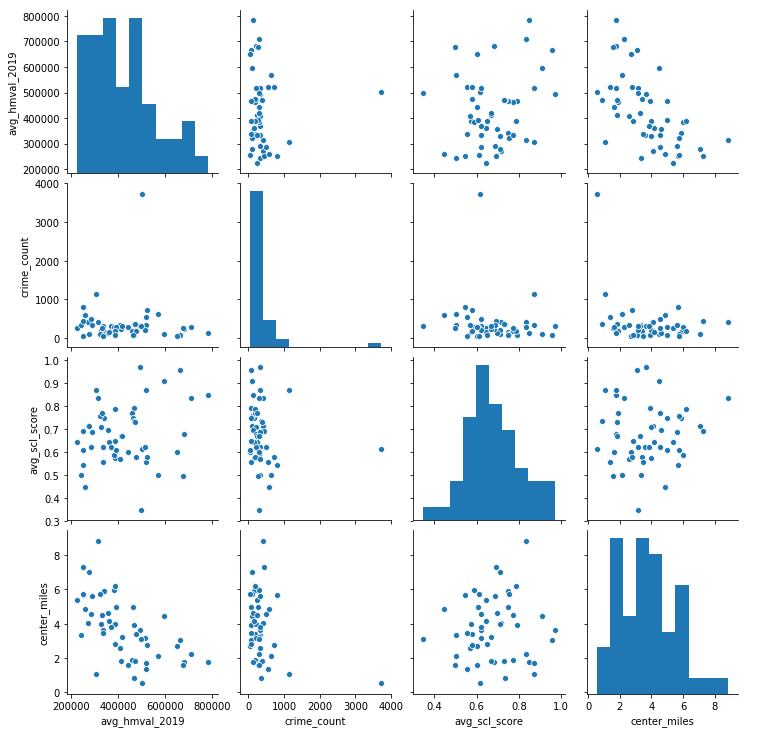

In [45]:
sns.pairplot(zllw_final_0[["avg_hmval_2019", "crime_count", 
                           "avg_scl_score", "center_miles"]])

##generate pairwise plot of non-foursquare variables

In [46]:
zllw_final_0[zllw_final_0["crime_count"] > 1000]
##the neighborhood downtown and west university appear to hold the particularlly high crime counts

,region_id,region_nam,city,state,lat,lon,avg_hmval_2019,crime_count,avg_scl_score,center_miles,bakery_dessert,coffee,entertainment,fitness,grocery_store,hotel,liquor_bar,park_outdoors,restaurant,shop_mall
4,271635,West University,Austin,TX,30.2896,-97.7459,306491.5833,1132.0000,0.8700,1.0795,9,7,8,7,6,8,9,13,29,3
23,271353,Downtown,Austin,TX,30.2681,-97.7448,502270.9167,3726.0000,0.6140,0.5238,5,9,8,8,3,10,11,14,28,3


In [47]:
zllw_final_1 = zllw_final_0[(zllw_final_0["region_nam"] != "Downtown") & 
                            (zllw_final_0["region_nam"] != "West University")]
##drop Downtown and West University neighborhood

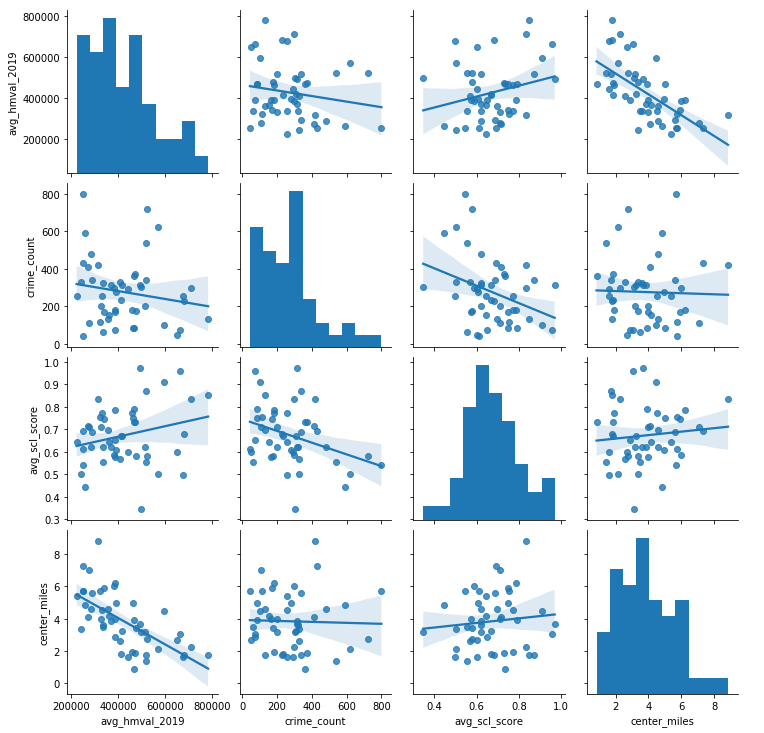

In [48]:
sns.pairplot(zllw_final_1[["avg_hmval_2019", "crime_count", 
                           "avg_scl_score", "center_miles"]], kind = "reg")

##updated pairwise plot of non-foursquare variables

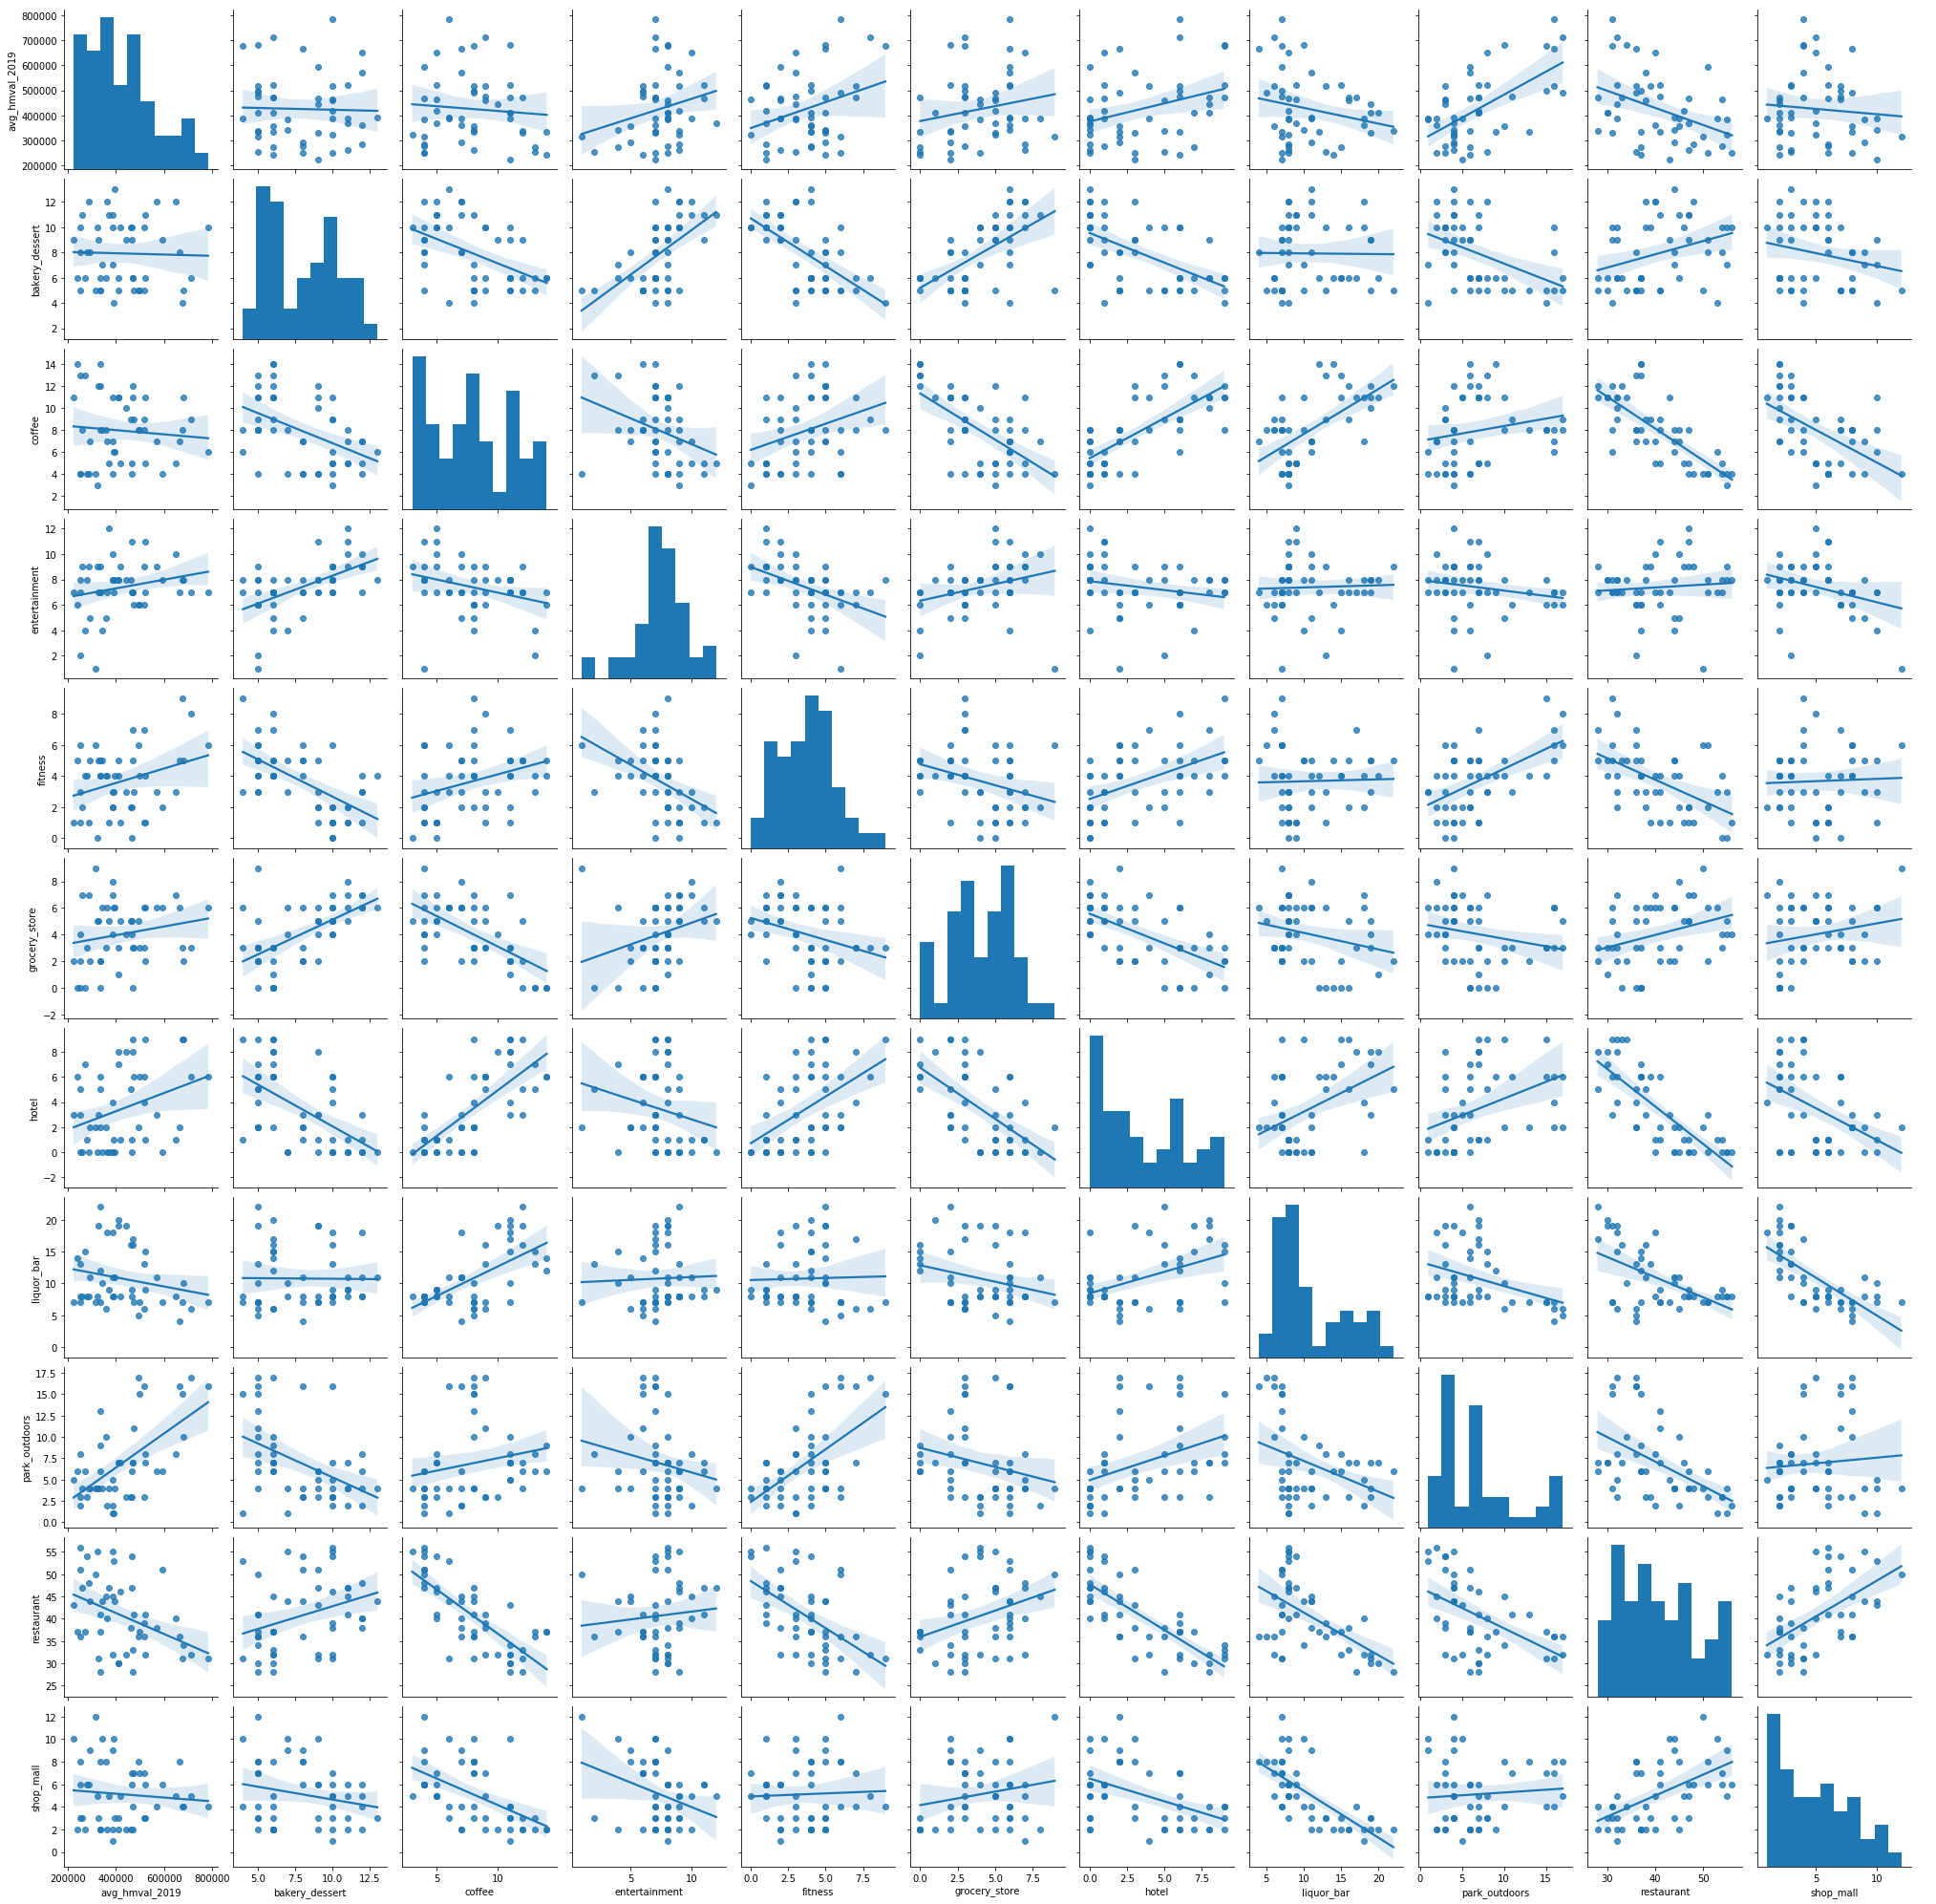

In [49]:
sns.pairplot(zllw_final_1[["avg_hmval_2019", "bakery_dessert", "coffee",
                           "entertainment", "fitness", "grocery_store",
                           "hotel", "liquor_bar", "park_outdoors",
                           "restaurant", "shop_mall"]], kind = "reg")

In [50]:
zllw_final_2  = zllw_final_1[["region_id", "region_nam", "city", "state",
                              "lat", "lon", "avg_hmval_2019", "crime_count",
                              "avg_scl_score", "center_miles", "entertainment", "fitness",
                              "grocery_store", "hotel", "liquor_bar", "park_outdoors",
                              "restaurant"]]
##based on the results of the pairplot let's drop “bakery_dessert”, “coffee” and “shop_mall” 

In [51]:
from statsmodels.graphics.correlation import plot_corr
##import function for correlation heat map

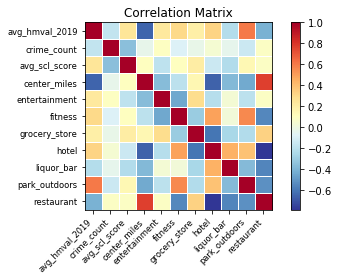

In [52]:
corr = zllw_final_2[["avg_hmval_2019", "crime_count", "avg_scl_score", "center_miles", 
                     "entertainment", "fitness", "grocery_store", "hotel", 
                     "liquor_bar", "park_outdoors", "restaurant"]].corr()

zllw_corr_mtx = plot_corr(corr, xnames = corr.columns)
##generate a correlation heat map

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
##import package to check VIF

In [54]:
vif_var_0 = zllw_final_2[["crime_count", "avg_scl_score", "center_miles", 
                          "entertainment", "fitness", "grocery_store", "hotel", 
                          "liquor_bar", "park_outdoors", "restaurant"]]

def vif_calc(df_var_list):
    
    df_var_list["intercept"] = 1
    
    # Compute and view VIF
    vif = pd.DataFrame()
    vif["variables"] = df_var_list.columns
    vif["VIF"] = [variance_inflation_factor(df_var_list.values, i) for i in range(df_var_list.shape[1])]
    
    # View results using print
    print(vif)

vif_calc(vif_var_0)
    
#drop restaurant, hotel, park_outdoors

##it looks like there may be some strong correlations
##lets check VIFs to see what should be dropped before running the regression

        variables       VIF
0     crime_count    1.2851
1   avg_scl_score    1.3572
2    center_miles    7.8698
3   entertainment    2.7630
4         fitness    2.5192
5   grocery_store    2.4495
6           hotel    5.9685
7      liquor_bar   10.9917
8   park_outdoors   10.9596
9      restaurant   17.7936
10      intercept 1353.4742


c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [55]:
vif_var_1 = zllw_final_2[["crime_count", "avg_scl_score", "center_miles", 
                          "entertainment", "fitness", "grocery_store", "hotel", 
                          "liquor_bar"]]

vif_calc(vif_var_1)
##let's try dropping restaurant and park_outdoors
##this looks much better, hotel is a little high but we'll assume that's ok

       variables      VIF
0    crime_count   1.1815
1  avg_scl_score   1.3297
2   center_miles   3.8156
3  entertainment   2.3294
4        fitness   1.6876
5  grocery_store   1.9628
6          hotel   5.4719
7     liquor_bar   1.4044
8      intercept 219.7077


c:\users\bpace\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [56]:
zllw_reg_df_0 = zllw_final_2[["avg_hmval_2019", "crime_count", "avg_scl_score", "center_miles", 
                              "entertainment", "fitness", "grocery_store", "hotel", 
                              "liquor_bar"]]
##data frame for regression

In [ ]:
##################################################
#
#
#Section 3 - Regression Model, (Results – Part 2 Regression Model)
#
#
##################################################

In [57]:
import statsmodels.formula.api as sm

reg_str = """avg_hmval_2019 ~ crime_count + avg_scl_score + center_miles +
                              entertainment + fitness + grocery_store + hotel + 
                              liquor_bar"""

##import required package and define regression model

In [58]:
reg_model_0 = sm.ols(formula = reg_str, data = zllw_reg_df_0)

reg_output_0 = reg_model_0.fit()
##run regression model

In [59]:
print(reg_output_0.summary())

                            OLS Regression Results                            
Dep. Variable:         avg_hmval_2019   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.84
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.50e-12
Time:                        12:29:06   Log-Likelihood:                -607.66
No. Observations:                  49   AIC:                             1233.
Df Residuals:                      40   BIC:                             1250.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.231e+05   1.38e+05      3.794

In [60]:
import matplotlib.pyplot as plt
##import plt function

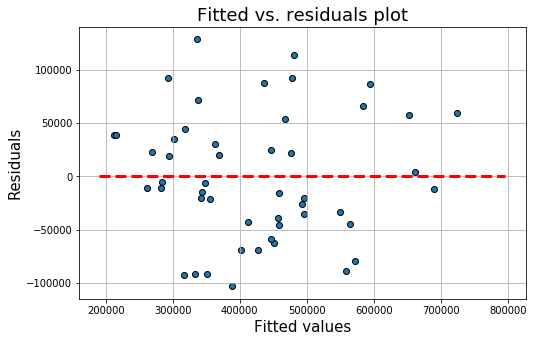

In [61]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=reg_output_0.fittedvalues,y=reg_output_0.resid,edgecolor='k')
xmin=min(reg_output_0.fittedvalues)
xmax = max(reg_output_0.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()
##check the fitted values vs the residuals
##this looks ok

In [62]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = het_breuschpagan(reg_output_0.resid, reg_output_0.model.exog)

lzip(name, test)
##run a breuschpagan test to check for heteroscedasticity
##again we can confirm that heteroscedasticity shouldn't be an issue

[('Lagrange multiplier statistic', 9.783872868616857),
 ('p-value', 0.2805241450333013),
 ('f-value', 1.2474297673299821),
 ('f p-value', 0.2978773767674436)]

<Figure size 576x360 with 0 Axes>

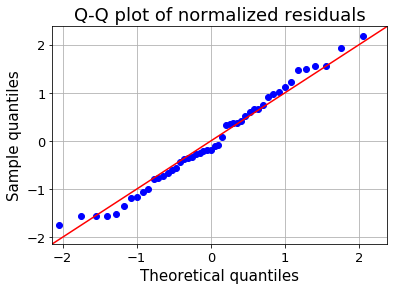

In [63]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(8,5))
fig=qqplot(reg_output_0.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()
##qqplot can be used to check if residuals are normally distributed

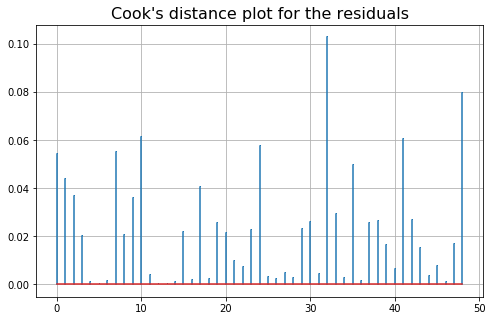

In [64]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(reg_output_0)

(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()
##cook's distance can be used to check if any observations have a strong influence
##on the model